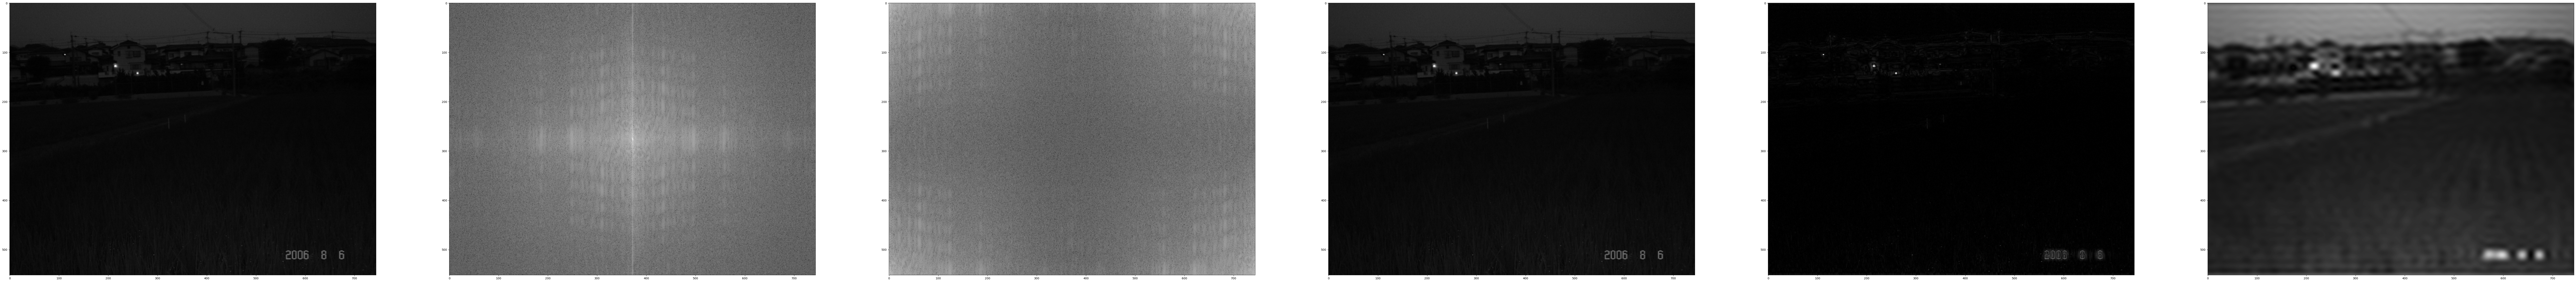

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread(r'H0201RGB.bmp',0)  #img.shape返回(512, 512)

#------------------生成并显示频谱图像-------------------------------------
f = np.fft.fft2(img)   #生成频谱图像, f是一个浮点型的数组，是一个复数数组。  f.shape返回(512, 512)
fshift = np.fft.fftshift(f)   #将零频率分量移动到中心位置， fshift也是一个浮点型的复数数组。fshift.shape返回(512, 512)
magnitude_spectrum = 20*np.log(np.abs(fshift))   #为显示图像，将复数值调到[0,256]的灰度空间内。  magnitude_spectrum.shape返回(512, 512)
magnitude_spectrum1 = 20*np.log(np.abs(f)) #假如不移动零频率分量，看看图像呈现什么样子  

#-------------------------实现傅里叶逆变换-----------------------------------
ishift = np.fft.ifftshift(fshift)  #将零频率分量还原      (ishift == f).sum() = 512*512
iimg = np.fft.ifft2(ishift)  #逆傅里叶变换,变换后的结果还是一个复数数组
img_inv = np.abs(iimg)    #将复数数组转换到[0,256]灰度区间内

#---------------------------分离高低频信号-------------------------------
center_row = int(img.shape[0]/2)      #生成中心点
center_col = int(img.shape[1]/2)

fshift1 = fshift.copy()
fshift1[center_row-30:center_row+30, center_col-30:center_col+30]=0   #把中间的区域置为0，生成高频信号频域图
ifshift1 = np.fft.ifftshift(fshift1)
iimg = np.fft.ifft2(ifshift1)
img_inv1 = np.abs(iimg)

fshift2 = fshift.copy()   #把四周区域都置为0，生成低频信号频域图
fshift2[0:center_row-30]=0
fshift2[center_row+30:]=0
fshift2[:, 0:center_col-30]=0
fshift2[:, center_col+30:]=0
ifshift2 = np.fft.ifftshift(fshift2)
iimg2 = np.fft.ifft2(ifshift2)
img_inv2 = np.abs(iimg2)

#可视化：
plt.figure(figsize=(16,6))
plt.subplot(161), plt.imshow(img, cmap='gray')    #原图
plt.subplot(162), plt.imshow(magnitude_spectrum, cmap='gray')   #频域图
plt.subplot(163), plt.imshow(magnitude_spectrum1, cmap='gray')  #不移动零频率分量的频域图
plt.subplot(164), plt.imshow(img_inv, cmap='gray')     #频域图逆变换的结果
plt.subplot(165), plt.imshow(img_inv1, cmap='gray')   #高频信号频域图的逆傅里叶变换结果图，都是边缘，都是像素变换较大的区域。比如脸里面、帽子里面、皮肤里面变化较小的区域都过滤掉了。
plt.subplot(166), plt.imshow(img_inv2, cmap='gray')   #低频信号频域图的逆傅里叶变换结果图，边缘模糊了，都是一些变换较缓的区域。和前面图的情况正好相反。  
plt.show()